In [1]:
# !pip install wordcloud
# !pip install multidict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"count"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['count']

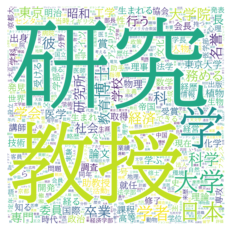

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,count
0,研究,62045
1,教授,48943
2,学,46051
3,大学,45192
4,日本,39788


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44829 entries, 0 to 48484
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    44829 non-null  object
 1   count   44829 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['count']

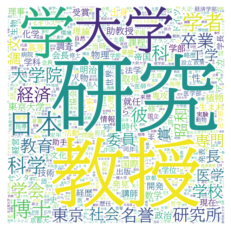

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
##CHANGE FILE NAME!!
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,count
17,務める,12277
20,行う,11104
36,生まれる,7081
45,経る,6494
48,学ぶ,6395


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3288 entries, 17 to 48438
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    3288 non-null   object
 1   count   3288 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.1+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['count']

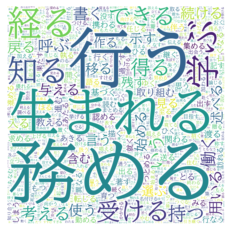

In [14]:
wc = WordCloud(background_color="white", \
               max_words=1500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_verb.png")

In [15]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('m_scientist_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,count
93,ない,4078
338,多い,1218
471,新しい,920
486,高い,887
585,大きい,746


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 93 to 48350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    368 non-null    object
 1   count   368 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.6+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['count']

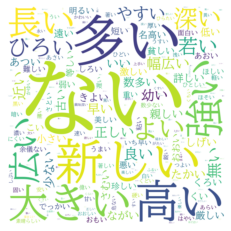

In [19]:
wc = WordCloud(background_color="white", \
               max_words=300, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=900,height=900)

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_mScientist_adj.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.getElementsByTagName("svg")[0];
    text_tags =  svg.getElementsByTagName("text")
    for(var i=0; i<text_tags.length; i++){
        text_tags[i].addEventListener(
            "click",
            function(){
                word = this.textContent;
                word_uri = encodeURI(word);
                url = "https://jisho.org/search/" + word_uri;
                window.open(url, "_bkank");
            }
        )
    }
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("maleScientictAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)